In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num_evals = 0

In [ ]:
def de(fobj, bounds, F_scale=0.8, cross_prob=0.7, popsize=20, max_iters=100):
    dimensions = len(bounds)

    lower_bound, upper_bound = np.asarray(bounds).T

    diff = np.fabs(lower_bound - upper_bound)

    pop = lower_bound + diff * np.random.rand(popsize, dimensions)

    fitness = np.asarray([fobj(ind) for ind in pop])

    best_idx = np.argmin(fitness)

    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx]))
    all_pops.append(np.copy(pop))
    for i in range(max_iters):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(a + F_scale * (b-c), lower_bound, upper_bound)

            cross_points = np.random.rand(dimensions) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            
            trial = np.where(cross_points, mutant, pop[j])

            f = fobj(trial)

            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial
        
        results.append((np.copy(best), fitness[best_idx]))
        all_pops.append(np.copy(pop))

    
    return results, all_pops


In [ ]:
def es(fobj, bounds, sigma_init=1.0, c_inc=1.1, c_dec=0.6, popsize=20, max_iters=100):
    dimensions = len(bounds)

    lower_bound, upper_bound = np.asarray(bounds).T

    diff = np.fabs(lower_bound - upper_bound)

    mu = lower_bound + diff * np.random.rand(dimensions)

    mu_fitness = fobj(mu)

    results = []
    all_pops = []
    results.append((np.copy(mu), mu_fitness))
    sigma = sigma_init

    for i in range(max_iters):
        epsilon = np.random.randn(popsize, dimensions)
        offspring = mu + sigma * epsilon
        offspring = np.clip(offspring, lower_bound, upper_bound)
        offspring_fitness = np.asarray([fobj(offspring[i]) for i in range(popsize)])

        best_idx = offspring_fitness.argmin()
        best_fitness = offspring_fitness[best_idx]
        best_offspring = offspring[best_idx]

        if best_fitness <= mu_fitness:
            mu = best_offspring.copy()
            mu_fitness = best_fitness
            sigma *= c_inc
        else:
            sigma *= c_dec

        results.append((np.copy(mu), mu_fitness))
        all_pops.append(np.copy(offspring))

    return results, all_pops

In [ ]:
# Sphere
# def f(z):
#     x = z[0]
#     y = z[1]
#     return x*x + y*y

# def F(x,y):
#     return x*x + y*y

In [ ]:
# Rastrigin
def f(z):
    res = 10*len(z)
    for i in range(len(z)):
        res += (z[i]*z[i] - 10.0 * np.cos(2*np.pi*z[i]))

    return res

def F(x,y):
    res = 20.0
    res += (x*x - 10.0*np.cos(2*np.pi*x))
    res += (y*y - 10.0*np.cos(2*np.pi*y))

    return res

In [ ]:
np.random.seed(19520007)
results, all_pops = de(f, bounds=[(-3,3)]*2, popsize=10, max_iters=30)
num_evals = 0
#results, all_pops = es(f, bounds=[(-3,3)]*2, popsize=20, max_iters=300)
#results[-1]

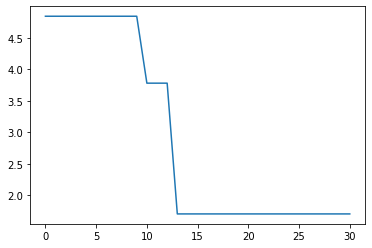

In [ ]:
x, f = zip(*results)
plt.plot(f)

In [ ]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

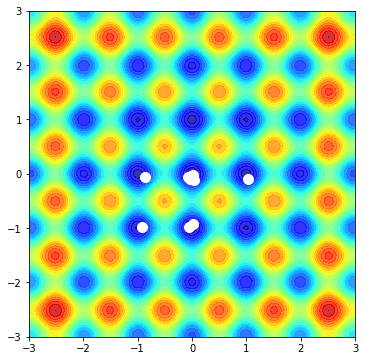

In [ ]:
plt.figure(figsize=(6,6))
plt.contourf(X, Y, Z, 20, cmap='jet', alpha=0.8)
plt.axis('square')

generation = 29
plt.scatter(all_pops[generation][:,0], all_pops[generation][:,1], s=100, c='#FFFFFF')

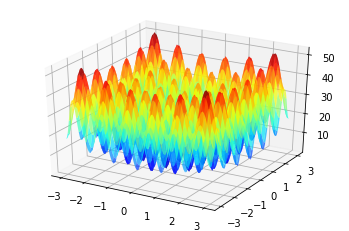

In [ ]:
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap='jet', rstride=2, cstride=2, alpha=0.7)